In [49]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [52]:
train_path =r'coba/Train Dataset'
val_path =r'coba/Valid Dataset'

In [79]:
train_datagen = ImageDataGenerator(
    rescale=1/255, 
    horizontal_flip=True, 
    shear_range=0.2, 
    zoom_range=0.2,
    rotation_range=30,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=64, 
    class_mode='categorical',
    target_size=(150,150)
)

val_datagen = ImageDataGenerator(
    rescale=1/255, 
    horizontal_flip=True, 
    shear_range=0.2, 
    zoom_range=0.2,
    rotation_range=30,
    fill_mode='nearest')
val_generator = val_datagen.flow_from_directory(
    val_path,
    batch_size=64, 
    class_mode='categorical',
    target_size=(150,150)
)

Found 900 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [54]:
image, label = train_generator.next()

In [55]:
labels = ['Backpack Min Bag','Shoulder Bag','Tote Bag']

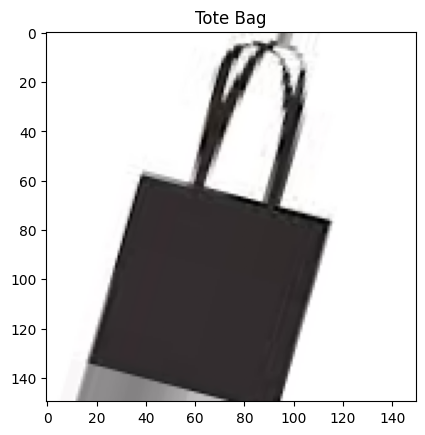

In [56]:
data = 3
plt.imshow(image[data])
plt.title(labels[tf.argmax(label[data])])
plt.show()

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])

In [69]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(512, activation = 'relu', input_dim = 784), 
#     tf.keras.layers.Dense(256, activation = 'relu'),
#     tf.keras.layers.Dense(124, activation = 'relu'),
#     tf.keras.layers.Dense(10, activation = 'softmax')
# ])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 82944)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
## callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('loss') < 1e-4): #akan berhenti apabila memenuhi
            self.model.stop_training = True
            
cb = myCallback()

In [73]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data = val_generator, callbacks = cb
)

Epoch 1/50
15/15 [==============================] - 26s 2s/step - loss: 1.1111 - accuracy: 0.4667 - val_loss: 9.0390 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 26s 2s/step - loss: 2.2642 - accuracy: 0.4367 - val_loss: 0.9869 - val_accuracy: 0.5289
Epoch 3/50
15/15 [==============================] - 26s 2s/step - loss: 1.0092 - accuracy: 0.5567 - val_loss: 0.8897 - val_accuracy: 0.6233
Epoch 4/50
15/15 [==============================] - 26s 2s/step - loss: 0.9621 - accuracy: 0.5389 - val_loss: 1.0019 - val_accuracy: 0.5144
Epoch 5/50
15/15 [==============================] - 26s 2s/step - loss: 1.2099 - accuracy: 0.4956 - val_loss: 2.3623 - val_accuracy: 0.3789
Epoch 6/50
15/15 [==============================] - 26s 2s/step - loss: 1.2570 - accuracy: 0.5222 - val_loss: 0.8762 - val_accuracy: 0.6311
Epoch 7/50
15/15 [==============================] - 26s 2s/step - loss: 0.9590 - accuracy: 0.5644 - val_loss: 0.8766 - val_accuracy: 0.6044
Epoch 8/50
15/15 [==

In [74]:
#train
y_acctrain = history.history['accuracy']
y_accval = history.history['val_accuracy']

#validation
y_losstrain = history.history['loss']
y_lossval = history.history['val_loss']

#epoch
x_ = range(len(y_acctrain))

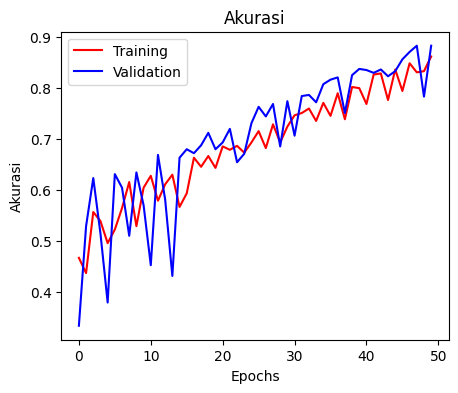

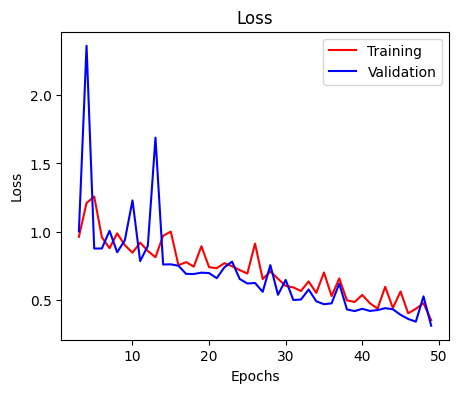

In [75]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acctrain, c='r', label='Training')
plt.plot(x_, y_accval, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_losstrain[3:], c='r', label='Training')
plt.plot(x_[3:], y_lossval[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
model.evaluate(val_generator)

15/15 [==============================] - 13s 809ms/step - loss: 0.3006 - accuracy: 0.8844


[0.3006073236465454, 0.8844444155693054]

In [81]:
result = model.predict(val_generator)
print(result)

15/15 [==============================] - 10s 642ms/step
[[2.0590422e-03 5.9809560e-01 3.9984533e-01]
 [1.6965462e-03 5.0094221e-02 9.4820923e-01]
 [9.4889486e-01 5.0928723e-02 1.7646370e-04]
 ...
 [3.2764369e-01 3.3049658e-01 3.4185973e-01]
 [1.3970081e-02 1.2972865e-03 9.8473257e-01]
 [4.8422504e-02 4.7333020e-01 4.7824731e-01]]


In [83]:
model.save('model1.h5')

## Convolutional Neural Network (CNN)